# See how topic clusters change over chunk size

In [34]:
from rolling.pdf import list_pdfs, read_pdf
pdfs = list_pdfs()
len(pdfs), pdfs[:3]

(1020,
 ['./arxiv_downloads\\0808.2870v1.Measuring_Distance_and_Properties_of_the_Milky_Way_s_Central_Supermassive_Black_Hole_with_Stellar_Orbits.pdf',
  './arxiv_downloads\\0809.4677v1.Approaching_the_event_horizon__1_3mm_VLBI_of_SgrA_.pdf',
  './arxiv_downloads\\0812.0743v2.A_Novel_Clustering_Algorithm_Based_on_Quantum_Games.pdf'])

In [35]:
papers = [
    read_pdf(p) for p in pdfs
]

MuPDF error: syntax error: cannot find ExtGState resource 'A1'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find E

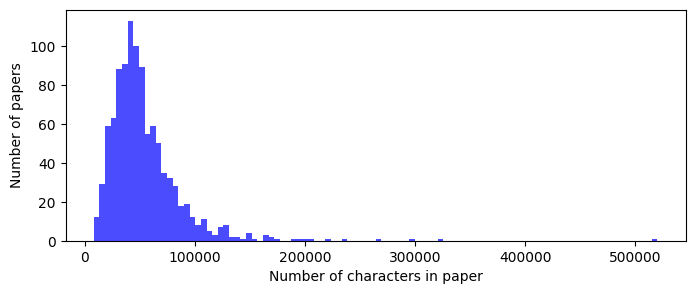

In [36]:
import numpy as np
from matplotlib import pyplot as plt

paper_lengths = np.array([len(p) for p in papers])

plt.figure(figsize=(8, 3))
plt.hist(paper_lengths, bins=100, color='blue', alpha=0.7)
plt.xlabel('Number of characters in paper')
plt.ylabel('Number of papers')
plt.show()

In [37]:
longest_paper = np.argmax(paper_lengths)
longest_paper = papers[longest_paper]
longest_paper[10000:10500]

'uts forth notions of rank as key for developing a theory of deep learning. Our approach adopts tools from dynamical systems theory and tensor analysis, build- ing on a recent connection between certain neural network architectures and tensor factorizations [51, 48, 52, 132, 118, 119].1 The main theoretical contributions and their practical implications are summarized below. Generalization via Implicit Rank Minimization (Part II) One of the central mysteries in deep learning is the ability of neu'

In [5]:
from rolling.embedding import GTEEmbeddingModel
model = GTEEmbeddingModel()
model.max_size

8192

In [6]:
from rolling.pdf import chunk_text
paper_embeddings = np.array(model.encode(chunk_text(longest_paper, 2048, hard_cut=False, overlap=True)))

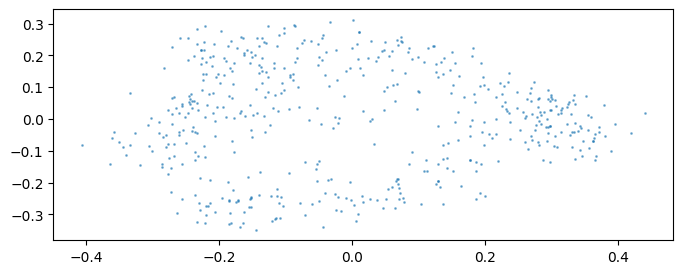

100%|█████████▉| 508/509 [00:14<00:00, 35.54it/s]


In [ ]:
from matplotlib.collections import LineCollection
from matplotlib.animation import FuncAnimation
from sklearn.decomposition import PCA
from IPython.display import Video
from tqdm import tqdm

# PCA transform
pca = PCA(n_components=2, random_state=42)
embs_2d = pca.fit_transform(paper_embeddings)

plt.figure(figsize=(8, 3))
plt.scatter(embs_2d[:, 0], embs_2d[:, 1], s=1, alpha=0.5)
plt.show()

points = embs_2d.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Normalize color
norm = plt.Normalize(0, len(segments))
colors = plt.cm.rainbow(norm(np.arange(len(segments))))
line_collection = LineCollection([], linewidths=0.5)
line_collection.set_color([])

fig, ax = plt.subplots(figsize=(8, 3))
ax.set_xlim(embs_2d[:, 0].min(), embs_2d[:, 0].max())
ax.set_ylim(embs_2d[:, 1].min(), embs_2d[:, 1].max())
ax.add_collection(line_collection)

def update(i):
    line_collection.set_segments(segments[:i])
    line_collection.set_color(colors[:i])
    return line_collection,

ani = FuncAnimation(fig, update, frames=len(segments), blit=True)
export_path = './plot_exports/paper_animation.mp4'
plt.tight_layout()

n_frames = len(segments)
pbar = tqdm(total=n_frames)
def progress_callback(current_frame, total):
    pbar.n = current_frame
    pbar.refresh()

ani.save(export_path, writer='ffmpeg', fps=60, dpi=200, progress_callback=progress_callback)
pbar.close()

plt.close('all')

Video(export_path, embed=True, width=800, height=300)

d:\rolling_embedding\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\rolling_embedding\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


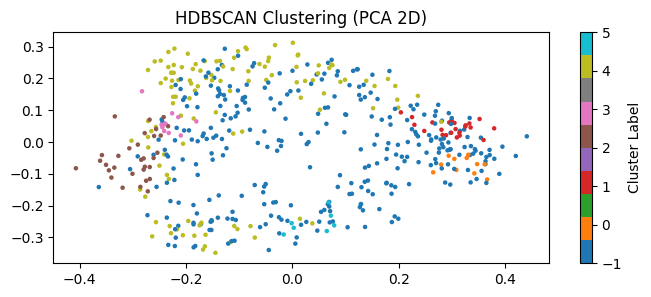

In [66]:
import matplotlib.pyplot as plt
import hdbscan

# Clustering
clusterer = hdbscan.HDBSCAN()
labels = clusterer.fit_predict(paper_embeddings)

# Plot
plt.figure(figsize=(8, 3))
scatter = plt.scatter(embs_2d[:, 0], embs_2d[:, 1], c=labels, cmap='tab10', s=5)
plt.colorbar(scatter, label="Cluster Label")
plt.title("HDBSCAN Clustering (PCA 2D)")
plt.show()


d:\rolling_embedding\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\rolling_embedding\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\rolling_embedding\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


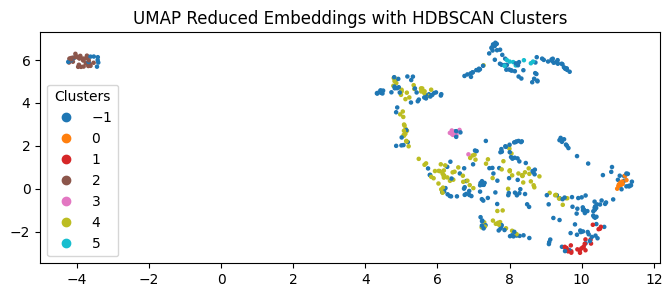

In [76]:
import hdbscan
import umap

clusterer = hdbscan.HDBSCAN()
labels = clusterer.fit_predict(paper_embeddings)
umap_model = umap.UMAP()
reduced_embeddings = umap_model.fit_transform(paper_embeddings)

plt.figure(figsize=(8, 3))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='tab10', s=5)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title("UMAP Reduced Embeddings with HDBSCAN Clusters")
plt.show()


In [78]:
from IPython.display import Video, display
from tqdm import tqdm
import matplotlib.colors as mcolors # Needed for normalizing labels

paper_embeddings = np.array(model.encode(chunk_text(longest_paper, 2048, hard_cut=False, overlap=True)))
clusterer = hdbscan.HDBSCAN()
labels = clusterer.fit_predict(paper_embeddings)
umap_model = umap.UMAP()
reduced_embeddings = umap_model.fit_transform(paper_embeddings)

CLUSTER_CMAP = 'tab10'
COLOR_NOISE_GRAY = True
NOISE_COLOR = '0.7' # Light gray for noise points

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

points = reduced_embeddings.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
n_frames = len(segments)

line_norm = plt.Normalize(0, n_frames)
line_colors = plt.cm.rainbow(line_norm(np.arange(n_frames)))

unique_labels = np.unique(labels)
if COLOR_NOISE_GRAY and -1 in unique_labels:
    cmap_func = plt.get_cmap(CLUSTER_CMAP, len(unique_labels) - 1)
    cluster_colors_dict = {label: cmap_func(i) for i, label in enumerate(l for l in unique_labels if l != -1)}
    cluster_colors_dict[-1] = mcolors.to_rgba(NOISE_COLOR)
else:
    cmap_func = plt.get_cmap(CLUSTER_CMAP, len(unique_labels))
    cluster_colors_dict = {label: cmap_func(i) for i, label in enumerate(unique_labels)}

point_colors = np.array([cluster_colors_dict[label] for label in labels])
fig, ax = plt.subplots(figsize=(10, 5)) # Adjusted size slightly

ax.set_xlim(reduced_embeddings[:, 0].min() - abs(reduced_embeddings[:, 0].min()*0.1),
            reduced_embeddings[:, 0].max() + abs(reduced_embeddings[:, 0].max()*0.1))
ax.set_ylim(reduced_embeddings[:, 1].min() - abs(reduced_embeddings[:, 1].min()*0.1),
            reduced_embeddings[:, 1].max() + abs(reduced_embeddings[:, 1].max()*0.1))
ax.set_title("Animated UMAP Embeddings with HDBSCAN Clusters")
ax.set_xlabel("UMAP Component 1")
ax.set_ylabel("UMAP Component 2")

line_collection = LineCollection([], linewidths=0.7, alpha=0.8)
ax.add_collection(line_collection)
scatter = ax.scatter([], [], s=5, alpha=0.9)

def update(i):
    current_frame_index = i + 1
    line_collection.set_segments(segments[:current_frame_index])
    line_collection.set_color(line_colors[:current_frame_index])
    scatter.set_offsets(reduced_embeddings[:current_frame_index+1])
    scatter.set_facecolors(point_colors[:current_frame_index+1])
    return line_collection, scatter

ani = FuncAnimation(fig, update, frames=n_frames, blit=True)

export_path = './plot_exports/umap_hdbscan_animation.mp4'
plt.tight_layout()

pbar = tqdm(total=n_frames)
def progress_callback(current_frame, total_frames):
    pbar.n = current_frame + 1 
    pbar.refresh()

ani.save(export_path, writer='ffmpeg', fps=60, dpi=200, progress_callback=progress_callback)
pbar.close()

plt.close(fig)

display(Video(export_path, embed=True, width=800, height=300))

d:\rolling_embedding\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\rolling_embedding\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\rolling_embedding\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
100%|██████████| 509/509 [00:20<00:00, 24.86it/s]


In [79]:
from IPython.display import Video, display
from tqdm import tqdm
import matplotlib.colors as mcolors # Needed for normalizing labels

paper_embeddings = np.array(model.encode(chunk_text(longest_paper, 1024, hard_cut=False, overlap=True)))
clusterer = hdbscan.HDBSCAN()
labels = clusterer.fit_predict(paper_embeddings)
umap_model = umap.UMAP()
reduced_embeddings = umap_model.fit_transform(paper_embeddings)

CLUSTER_CMAP = 'tab10'
COLOR_NOISE_GRAY = True
NOISE_COLOR = '0.7' # Light gray for noise points

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

points = reduced_embeddings.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
n_frames = len(segments)

line_norm = plt.Normalize(0, n_frames)
line_colors = plt.cm.rainbow(line_norm(np.arange(n_frames)))

unique_labels = np.unique(labels)
if COLOR_NOISE_GRAY and -1 in unique_labels:
    cmap_func = plt.get_cmap(CLUSTER_CMAP, len(unique_labels) - 1)
    cluster_colors_dict = {label: cmap_func(i) for i, label in enumerate(l for l in unique_labels if l != -1)}
    cluster_colors_dict[-1] = mcolors.to_rgba(NOISE_COLOR)
else:
    cmap_func = plt.get_cmap(CLUSTER_CMAP, len(unique_labels))
    cluster_colors_dict = {label: cmap_func(i) for i, label in enumerate(unique_labels)}

point_colors = np.array([cluster_colors_dict[label] for label in labels])
fig, ax = plt.subplots(figsize=(10, 5)) # Adjusted size slightly

ax.set_xlim(reduced_embeddings[:, 0].min() - abs(reduced_embeddings[:, 0].min()*0.1),
            reduced_embeddings[:, 0].max() + abs(reduced_embeddings[:, 0].max()*0.1))
ax.set_ylim(reduced_embeddings[:, 1].min() - abs(reduced_embeddings[:, 1].min()*0.1),
            reduced_embeddings[:, 1].max() + abs(reduced_embeddings[:, 1].max()*0.1))
ax.set_title("Animated UMAP Embeddings with HDBSCAN Clusters")
ax.set_xlabel("UMAP Component 1")
ax.set_ylabel("UMAP Component 2")

line_collection = LineCollection([], linewidths=0.7, alpha=0.8)
ax.add_collection(line_collection)
scatter = ax.scatter([], [], s=5, alpha=0.9)

def update(i):
    current_frame_index = i + 1
    line_collection.set_segments(segments[:current_frame_index])
    line_collection.set_color(line_colors[:current_frame_index])
    scatter.set_offsets(reduced_embeddings[:current_frame_index+1])
    scatter.set_facecolors(point_colors[:current_frame_index+1])
    return line_collection, scatter

ani = FuncAnimation(fig, update, frames=n_frames, blit=True)

export_path = './plot_exports/umap_hdbscan_animation.mp4'
plt.tight_layout()

pbar = tqdm(total=n_frames)
def progress_callback(current_frame, total_frames):
    pbar.n = current_frame + 1 
    pbar.refresh()

ani.save(export_path, writer='ffmpeg', fps=60, dpi=200, progress_callback=progress_callback)
pbar.close()

plt.close(fig)

display(Video(export_path, embed=True, width=800, height=300))

d:\rolling_embedding\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\rolling_embedding\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\rolling_embedding\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
100%|██████████| 1026/1026 [00:49<00:00, 20.56it/s]


---

In [7]:
from bertopic import BERTopic
topic_model = BERTopic(embedding_model=model, verbose=True)
topics, probs = topic_model.fit_transform(chunk_text(longest_paper, 1024, hard_cut=False, overlap=True))

2025-04-17 15:47:06,449 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/33 [00:00<?, ?it/s]

2025-04-17 15:47:08,287 - BERTopic - Embedding - Completed ✓
2025-04-17 15:47:08,288 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-17 15:47:14,065 - BERTopic - Dimensionality - Completed ✓
2025-04-17 15:47:14,066 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-17 15:47:14,089 - BERTopic - Cluster - Completed ✓
2025-04-17 15:47:14,092 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-17 15:47:14,179 - BERTopic - Representation - Completed ✓


In [8]:
topic_model.get_topic_info()

Topic  Count                                            Name  \
0      -1    156                                 -1_the_of_is_to   
1       0     93                              0_edges_wis_of_the   
2       1     91          1_conference_learning_on_international   
3       2     71                        2_matrix_norms_quasi_the   
4       3     69                                 3_wn_ewn_wt_1wn   
5       4     68                                 4_jt_vt_with_ρl   
6       5     60                        5_tensor_ground_truth_of   
7       6     42                                  6_νc_rpa_pa_rν   
8       7     36                                   7_ρl_dh_zz_dj   
9       8     30  8_pathfinder_regularization_dependencies_range   
10      9     29         9_tensor_factorization_hierarchical_non   
11     10     28                                 10_wm_2lm_w1_wx   
12     11     26                           11_wm_wl_symmetric_w1   
13     12     24                   12_ci_neighbors_ic_admissible   
14     13     24                                  13_dn_hn_ik_h1   
15     14     18                       14_wt_trajectory_time_one   
16     15     17               15_tensor_local_tree_hierarchical   
17     16     16      16_magnitude_unbalancedness_component_zero   
18     17     16           17_networks_neural_interactions_graph   
19     18     16             18_hierarchical_tensor_section_rank   
20     19     15                                  19_lc_lν_wh_lh   
21     20     15                            20_wm_wx_2lm_infimal   
22     21     15                 21_10_predictors_mnist_datasets   
23     22     14          22_complexity_neural_generalization_of   
24     23     13                            23_νk_rankjw_jw_that   
25     24     13                      24_weights_log_template_αc   
26     25     12         25_network_factorization_pooling_hidden   

                                       Representation  \
0   [the, of, is, to, tensor, and, in, for, with, ...   
1   [edges, wis, of, the, edge, and, graph, walk, ...   
2   [conference, learning, on, international, neur...   
3   [matrix, norms, quasi, the, to, in, is, of, an...   
4   [wn, ewn, wt, 1wn, lh, w1, that, dt, t0, equat...   
5   [jt, vt, with, ρl, associated, in, legs, the, ...   
6   [tensor, ground, truth, of, to, was, the, 10, ...   
7     [νc, rpa, pa, rν, sq, for, πν, the, all, lemma]   
8   [ρl, dh, zz, dj, that, all, diagonal, for, tem...   
9   [pathfinder, regularization, dependencies, ran...   
10  [tensor, factorization, hierarchical, non, con...   
11      [wm, 2lm, w1, wx, σ2, σ1, bound, w2, z2, e1e]   
12  [wm, wl, symmetric, w1, lm, lemma, is, the, σr...   
13  [ci, neighbors, ic, admissible, i0, length, wa...   
14        [dn, hn, ik, h1, sep, d1, gr, sv, fθ, grid]   
15  [wt, trajectory, time, one, balanced, distance...   
16  [tensor, local, tree, hierarchical, factorizat...   
17  [magnitude, unbalancedness, component, zero, l...   
18  [networks, neural, interactions, graph, model,...   
19  [hierarchical, tensor, section, rank, in, fact...   
20  [lc, lν, wh, lh, dtσ, νc, 2σ, equation, dt, time]   
21  [wm, wx, 2lm, infimal, σ2, es, effective, σ1, ...   
22  [10, predictors, mnist, datasets, fit, one, ra...   
23  [complexity, neural, generalization, of, data,...   
24  [νk, rankjw, jw, that, zero, contradiction, ho...   
25  [weights, log, template, αc, vectors, ρl, almo...   
26  [network, factorization, pooling, hidden, laye...   

                                  Representative_Docs  
0   [∏l−1 l′=1 Djl′ . 39 nodes in T except for the...  
1   [in our experiments has markedly outperformed ...  
2   [[64] Matthias Fey and Jan Eric Lenssen. Fast ...  
3   [(and quasi-norms) towards infinity is, respec...  
4   [t′ > 0 and r ∈[R]. Denote γr(t) := ⟨−∇Lh(WT(t...  
5   [distinction between the operation of a GNN ov...  
6   [caption of Figure 2.2, as well as Appendix B....  
7   [r′,r + U(ν) r′,r  h ⊗νc∈C(ν)W(νc,r′)i = πν ... 

In [9]:
topic_model.visualize_topics()

In [10]:
topic_model.visualize_heatmap()

In [11]:
topic_model.visualize_barchart()

In [12]:
topic_model.visualize_hierarchy()

---

In [1]:
from datasets import load_dataset
dataset = load_dataset("CShorten/ML-ArXiv-Papers")["train"]
abstracts = dataset["abstract"]
titles = dataset["title"]

In [2]:
from nltk.tokenize import sent_tokenize
sentences = [sent_tokenize(abstract) for abstract in abstracts]
sentences = [sentence for sublist in sentences for sentence in sublist]  # Flatten the list of lists
len(sentences), sentences[:3]

(854827,
 ['  The problem of statistical learning is to construct a predictor of a random\nvariable $Y$ as a function of a related random variable $X$ on the basis of an\ni.i.d.',
  'training sample from the joint distribution of $(X,Y)$.',
  'Allowable\npredictors are drawn from some specified class, and the goal is to approach\nasymptotically the performance (expected loss) of the best predictor in the\nclass.'])

In [3]:
from rolling.embedding import GTEEmbeddingModel
model = GTEEmbeddingModel()

In [ ]:
# !py -m spacy download en_core_web_sm

In [4]:
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=150, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
vectorizer_model = CountVectorizer(stop_words="english", min_df=2, ngram_range=(1, 2))

keybert_model = KeyBERTInspired()
pos_model = PartOfSpeech("en_core_web_sm")
mmr_model = MaximalMarginalRelevance(diversity=0.3)

representation_model = {
    "KeyBERT": keybert_model,
    "MMR": mmr_model,
    "POS": pos_model
}

topic_model = BERTopic(
  embedding_model=model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  vectorizer_model=vectorizer_model,
  representation_model=representation_model,
  top_n_words=10,
  verbose=True
)

In [5]:
embeddings = model.encode(sentences, progressbar=True, batch_size=128)

100%|██████████| 6679/6679 [04:16<00:00, 26.03it/s]


In [9]:
topics, probs = topic_model.fit_transform(sentences, embeddings)
topic_model.get_topic_info()

2025-04-18 17:01:32,954 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-18 17:16:45,949 - BERTopic - Dimensionality - Completed ✓
2025-04-18 17:16:45,964 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-18 17:18:46,024 - BERTopic - Cluster - Completed ✓
2025-04-18 17:18:46,092 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-18 17:19:48,847 - BERTopic - Representation - Completed ✓


Topic   Count                                               Name  \
0       -1  410730                       -1_learning_model_based_data   
1        0   82718                0_fairness_limited_data_challenging   
2        1   31837                1_experiments_datasets_results_real   
3        2   16771                   2_graph_node_graphs_graph neural   
4        3   15906  3_adversarial_attacks_attack_adversarial examples   
..     ...     ...                                                ...   
248    247     160                  247_humans_concepts_human_ability   
249    248     159  248_inverse reinforcement_inverse_learning irl...   
250    249     158  249_regression_linear regression_linear_regres...   
251    250     153  250_surrogate_surrogate models_surrogate model...   
252    251     152  251_wavelet_wavelet transform_transform_discre...   

                                        Representation  \
0    [learning, model, based, data, network, neural...   
1    [fairness, limited, data, challenging, lack, d...   
2    [experiments, datasets, results, real, state a...   
3    [graph, node, graphs, graph neural, gnns, gnn,...   
4    [adversarial, attacks, attack, adversarial exa...   
..                                                 ...   
248  [humans, concepts, human, ability, human learn...   
249  [inverse reinforcement, inverse, learning irl,...   
250  [regression, linear regression, linear, regres...   
251  [surrogate, surrogate models, surrogate model,...   
252  [wavelet, wavelet transform, transform, discre...   

                                               KeyBERT  \
0    [classification, deep learning, machine learni...   
1    [training data, datasets, deep learning, machi...   
2    [synthetic data, datasets demonstrate, real da...   
3    [graph neural, graph classification, graph lea...   
4    [adversarial attack, adversarial training, adv...   
..                                                 ...   
248  [knowledge humans, skills knowledge, human int...   
249  [inverse reinforcement, demonstrations inverse...   
250  [regression paradigm, linear models, regressio...   
251  [surrogate models, models surrogate, simulatio...   
252  [wavelet transforms, wavelet transform, wavele...   

                                                   MMR  \
0    [model, neural, training, algorithm, paper, pe...   
1    [fairness, limited, data, bias, models, challe...   
2    [datasets, results, state art, real world, ben...   
3    [node, graph neural, networks gnns, graph conv...   
4    [adversarial, adversarial examples, adversaria...   
..                                                 ...   
248  [concepts, human learning, knowledge, humans l...   
249  [inverse reinforcement, inverse, learning irl,...   
250  [linear regression, regression models, regress...   
251  [surrogate models, surrogate modeling, based s...   
252  [wavelet transform, discrete wavelet, wavelets...   

                                                   POS  \
0    [learning, model, data, network, neural, model...   
1    [fairness, data, challenging, difficult, bias,...   
2    [experiments, datasets, results, real, art, ef...   
3    [graph, node, graphs, nodes, networks, node cl...   
4    [adversarial, attacks, attack, adversarial exa...   
..                                                 ...   
248  [humans, concepts, human, ability, human learn...   
249  [inverse reinforcement, inverse, reinforcement...   
250  [regression, linear regression, linear, regres...   
251  [surrogate, surrogate models, surrogate model,...   
252  [wavelet, transform, discrete wavelet, wavelet...   

                                   Representative_Docs  
0    [To address this issue, in this paper we intro...  
1    [  In the medical domain, the lack of large tr...  
2    [The extensive experiments demonstrate the\nef...  
3    [  Graph neural networks (GNNs) have been wide...  
4    [Adversarial training in which\nadversarial ex... 

In [10]:
topic_model.visualize_topics()

In [12]:
topic_distr, _ = topic_model.approximate_distribution(abstracts, window=8, stride=4)

100%|██████████| 118/118 [01:07<00:00,  1.75it/s]


In [17]:
N = 27
abstracts[N]

'  In this article we develop quantum algorithms for learning and testing\njuntas, i.e. Boolean functions which depend only on an unknown set of k out of\nn input variables. Our aim is to develop efficient algorithms:\n  - whose sample complexity has no dependence on n, the dimension of the domain\nthe Boolean functions are defined over;\n  - with no access to any classical or quantum membership ("black-box")\nqueries. Instead, our algorithms use only classical examples generated\nuniformly at random and fixed quantum superpositions of such classical\nexamples;\n  - which require only a few quantum examples but possibly many classical\nrandom examples (which are considered quite "cheap" relative to quantum\nexamples).\n  Our quantum algorithms are based on a subroutine FS which enables sampling\naccording to the Fourier spectrum of f; the FS subroutine was used in earlier\nwork of Bshouty and Jackson on quantum learning. Our results are as follows:\n  - We give an algorithm for testing

In [18]:
topic_model.visualize_distribution(topic_distr[N])

In [20]:
new_topics = topic_model.reduce_outliers(sentences, topics, strategy="embeddings", embeddings=embeddings)

In [21]:
topic_model.update_topics(sentences, topics=new_topics)

2025-04-18 17:26:54,652 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


In [22]:
topic_model.visualize_topics()

---

In [52]:
# calc topics for doc
from rolling.pdf import chunk_text
doc = longest_paper
doc_chunks = chunk_text(doc, 1024, hard_cut=False, overlap=True)
doc_embeddings = model.encode(doc_chunks, progressbar=True)
doc_topics, doc_probs = topic_model.transform(doc_chunks, doc_embeddings)

100%|██████████| 33/33 [00:01<00:00, 18.70it/s]
2025-04-18 17:39:54,588 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-18 17:39:57,472 - BERTopic - Dimensionality - Completed ✓
2025-04-18 17:39:57,473 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-18 17:39:58,070 - BERTopic - Cluster - Completed ✓


In [83]:
doc_topic_distr, _ = topic_model.approximate_distribution(doc_chunks, window=8, stride=4)
doc_topic_distr.shape

100%|██████████| 2/2 [00:00<00:00,  4.54it/s]


(1027, 252)

In [92]:
N = 12

print(f"Chunk {N}:\n{doc_chunks[N]}")
topic_model.visualize_distribution(doc_topic_distr[N])

Chunk 12:
Background and Overview . . . . . . . . . . . . . . . . . . . . . . . . . 52 5.2 Preliminaries . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 54 5.3 Graph Neural Networks . . . . . . . . . . . . . . . . . . . . . . . . . . . 55 iv 5.4 Theoretical Analysis: The Effect of Input Graph Structure and Neural Network Architecture on Modeled Interactions . . . . . . . . . . . . . . 57 5.5 Practical Application: Expressivity Preserving Edge Sparsification . . . 62 6 Related Work 66 IV Conclusion 68 V Appendix 85 A Implicit Regularization in Deep Learning May Not Be Explainable by Norms 86 A.1 Extension to Different Matrix Dimensions . . . . . . . . . . . . . . . . . 86 A.2 Further Experiments and Implementation Details . . . . . . . . . . . . 87 A.3 Deferred Proofs . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 90 B Implicit Regularization in Tensor Factorization 114 B.1 Extension to Tensor Sensing . . . . . . . . . . . . . . . . . . . . . . . . .

In [101]:
doc_level_distr = doc_topic_distr.mean(axis=0)

top_k = 5
top_topic_indices = np.argsort(doc_level_distr)[-top_k:][::-1]
top_topic_probs = doc_level_distr[top_topic_indices]
top_topic_indices, top_topic_probs

for idx, prob in zip(top_topic_indices, top_topic_probs):
    topic_words = topic_model.get_topic(idx)  # returns list of (word, weight)
    topic_label = ", ".join([word for word, _ in topic_words[:5]])  # top-5 words
    print(f"Topic {idx}: {topic_label} (Prob: {prob:.4f})")


Topic 193: tensor, decomposition, tensors, rank, decompositions (Prob: 0.1436)
Topic 121: matrix, completion, rank, tensor, low (Prob: 0.1187)
Topic 242: proof, logic, proofs, reasoning, theorem (Prob: 0.0584)
Topic 122: nmf, factorization, nonnegative, matrix, negative (Prob: 0.0497)
Topic 40: equations, differential, equation, pdes, ode (Prob: 0.0451)


In [112]:
def get_topics_for_doc(text, top_k=5):
    chunks = chunk_text(text, 1024, hard_cut=False, overlap=True)
    embeddings = model.encode(chunks, progressbar=True)
    topics, probs = topic_model.transform(chunks, embeddings)
    topic_distr, _ = topic_model.approximate_distribution(chunks, window=8, stride=4)
    doc_level_distr = topic_distr.mean(axis=0)
    top_topic_indices = np.argsort(doc_level_distr)[-top_k:][::-1]
    top_topic_probs = doc_level_distr[top_topic_indices]
    topics_info = []
    for idx, prob in zip(top_topic_indices, top_topic_probs):
        topic_words = topic_model.get_topic(idx)  # returns list of (word, weight)
        topic_label = ", ".join([word for word, _ in topic_words[:5]])  # top-5 words
        topics_info.append((float(prob), topic_label))
    return topics_info

paper = papers[0]
print(paper[:1000], flush=True)
get_topics_for_doc(paper, top_k=5)

arXiv:0808.2870v1 [astro-ph] 21 Aug 2008 Draft version November 26, 2024 Preprint typeset using LATEX style emulateapj v. 08/22/09 MEASURING DISTANCE AND PROPERTIES OF THE MILKY WAY’S CENTRAL SUPERMASSIVE BLACK HOLE WITH STELLAR ORBITS A. M. Ghez1,2, S. Salim1,4, N. N. Weinberg3,5, J. R. Lu1, T. Do1, J. K. Dunn1, K. Matthews3, M. Morris1, S. Yelda1, E. E. Becklin1, T. Kremenek1, M. Milosavljevic6, J. Naiman1,7 Draft version November 26, 2024 ABSTRACT We report new precision measurements of the properties of our Galaxy’s supermassive black hole. Based on astrometric (1995-2007) and radial velocity (2000-2007) measurements from the W. M. Keck 10-meter telescopes, a fully unconstrained Keplerian orbit for the short period star S0-2 provides values for the distance (R0) of 8.0 ± 0.6 kpc, the enclosed mass (Mbh) of 4.1 ± 0.6 × 106M⊙, and the black hole’s radial velocity, which is consistent with zero with 30 km/s uncertainty. If the black hole is assumed to be at rest with respect to the Ga

100%|██████████| 7/7 [00:00<00:00, 15.95it/s]
2025-04-18 18:03:49,813 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-18 18:03:50,262 - BERTopic - Dimensionality - Completed ✓
2025-04-18 18:03:50,262 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-18 18:03:50,330 - BERTopic - Cluster - Completed ✓
100%|██████████| 1/1 [00:00<00:00,  8.40it/s]


[(0.24396820117502313, 'al, et, 2019, 2021, 2018'),
 (0.15245996010985444, 'gravitational, galaxy, stars, astronomical, galaxies'),
 (0.06790790147919636,
  'uncertainty, quantification, uncertainties, epistemic, estimates'),
 (0.028167387991380584,
  'hyperspectral, spectral, spectra, spectroscopy, raman'),
 (0.023340027392235913, 'covid, 19, chest, pneumonia, ct')]

In [114]:
for id in (17, 23, 42):
    paper = papers[id]
    print(paper[1000:2000], flush=True)
    result = get_topics_for_doc(paper, top_k=5)
    for prob, label in result:
        print(f"- {prob:.4f}: {label}")

    print('-'* 50)

i- cally fail. Since the decoupled activation function acts like an implicit regularizer, the model can be trained by minimizing the reconstruction error of training data, without requiring any additional regularization. 1 INTRODUCTION Autoencoders are popular models used for learning features and pretraining deep networks. In their simplest form, they are based on minimizing the squared error between an observation, x, and a non-linear reconstruction deﬁned as r(x) = X k h  wT k x + bk  wk + c (1) where wk and bk are weight vector and bias for hidden unit k, c is a vector of visible biases, and h(·) is a hidden unit activation function. Popular choices of activation function are the sigmoid h(a) =  1 + exp(−a) −1, or the rectiﬁed linear (ReLU) h(a) = max(0, a). Various regularization schemes can be used to prevent trivial solutions when using a large number of hidden units. These include corrupting inputs during learning Vincent et al. (2008), adding a “contraction” penalty which fo

100%|██████████| 3/3 [00:00<00:00,  9.26it/s]
2025-04-18 18:05:21,589 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-18 18:05:21,825 - BERTopic - Dimensionality - Completed ✓
2025-04-18 18:05:21,826 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-18 18:05:21,870 - BERTopic - Cluster - Completed ✓
100%|██████████| 1/1 [00:00<00:00, 15.62it/s]

- 0.0972: activation, relu, functions, function, networks
- 0.0887: autoencoder, autoencoders, auto, encoder, denoising
- 0.0719: al, et, 2019, 2021, 2018
- 0.0450: markov, hmm, hidden, hmms, model
- 0.0418: boltzmann, rbm, restricted, machines, rbms
--------------------------------------------------
 in addition to the overall objec- tive at the output layer (a different strategy to layer-wise pre-training). We extend techniques from stochastic gradient methods to analyze our algorithm. The advan- tage of our method is evident and our experimental result on benchmark datasets shows signiﬁcant performance gain over existing methods (e.g. all state-of-the-art results on MNIST, CIFAR-10, CIFAR-100, and SVHN). 1 Introduction Much attention has been given to a resurgence of neural networks, deep learning (DL) in particular, which can be of unsupervised [10], supervised [12], or a hybrid form [18]. Signiﬁcant performance gain has been observed, especially in the presence of large amount of 


100%|██████████| 3/3 [00:00<00:00, 30.00it/s]
2025-04-18 18:05:22,042 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-18 18:05:22,281 - BERTopic - Dimensionality - Completed ✓
2025-04-18 18:05:22,282 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-18 18:05:22,338 - BERTopic - Cluster - Completed ✓
100%|██████████| 1/1 [00:00<00:00, 14.92it/s]

- 0.0844: neural, layer, network, weights, networks
- 0.0602: cifar, mnist, imagenet, 10, accuracy
- 0.0560: convolutional, cnn, convolution, network, neural
- 0.0526: svm, vector, support, svms, machines
- 0.0465: gradient, convergence, convex, stochastic, descent
--------------------------------------------------
erforming the state-of-the-art. Introduction Recently, the multimodal learning between image and lan- guage (Ma et al. 2015; Makamura et al. 2013; Xu et al. 2015b) has become an increasingly popular research area of artiﬁcial intelligence (AI). In particular, there have been rapid progresses on the tasks of bidirectional image and sentence retrieval (Frome et al. 2013; Socher et al. 2014; Klein et al. 2015; Karpathy, Joulin, and Li 2014; Ordonez, Kulkarni, and Berg 2011), and automatic image captioning (Chen and Zitnick 2014; Karpathy and Li 2014; Donahue et al. 2014; Fang et al. 2014; Kiros, Salakhutdinov, and Zemel 2014a; Kiros, Salakhutdinov, and Zemel 2014b; Klein et al.


100%|██████████| 3/3 [00:00<00:00, 36.14it/s]
2025-04-18 18:05:22,495 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-18 18:05:22,657 - BERTopic - Dimensionality - Completed ✓
2025-04-18 18:05:22,657 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-18 18:05:22,714 - BERTopic - Cluster - Completed ✓
100%|██████████| 1/1 [00:00<00:00, 15.62it/s]

- 0.2107: question, questions, answering, answer, answers
- 0.0922: convolutional, cnn, convolution, network, neural
- 0.0887: word, words, embeddings, embedding, text
- 0.0836: al, et, 2019, 2021, 2018
- 0.0747: captioning, image, captions, text, caption
--------------------------------------------------


---

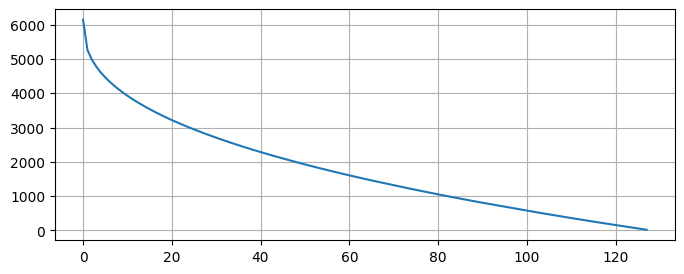

array([6144, 5261, 4979, 4774, 4607, 4464, 4337, 4222, 4116, 4018, 3927,
       3841, 3759, 3682, 3607, 3536, 3468, 3403, 3339, 3278, 3218, 3161,
       3105, 3050, 2997, 2945, 2895, 2845, 2797, 2750, 2703, 2658, 2613,
       2570, 2527, 2484, 2443, 2402, 2362, 2323, 2284, 2245, 2208, 2170,
       2134, 2097, 2062, 2026, 1992, 1957, 1923, 1890, 1857, 1824, 1791,
       1759, 1728, 1696, 1665, 1634, 1604, 1574, 1544, 1515, 1485, 1456,
       1428, 1399, 1371, 1343, 1315, 1288, 1261, 1233, 1207, 1180, 1154,
       1128, 1102, 1076, 1050, 1025, 1000,  975,  950,  925,  901,  876,
        852,  828,  805,  781,  757,  734,  711,  688,  665,  642,  620,
        597,  575,  553,  530,  509,  487,  465,  443,  422,  401,  379,
        358,  337,  316,  296,  275,  255,  234,  214,  194,  173,  153,
        133,  114,   94,   74,   55,   35,   16])

In [115]:
import numpy as np
start_val = 6144
end_val = 16
num_points = 128
p = 0.4

x_linear = np.linspace(0, 1, num_points)
chunk_sizes = end_val + (start_val - end_val) * (1 - x_linear**p)
chunk_sizes = np.round(chunk_sizes, 0).astype(int)
chunk_sizes = np.sort(np.unique(chunk_sizes))[::-1]

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 3))
plt.plot(chunk_sizes)
plt.grid(True)
plt.show()

chunk_sizes

In [125]:
from tqdm import tqdm

topic_counts = []
for chunk_size in tqdm(chunk_sizes):
    topics, probs = topic_model.fit_transform(chunk_text(longest_paper, int(chunk_size), hard_cut=True, overlap=True))
    topic_counts.append(len(set(topics)))


2025-04-18 18:15:34,376 - BERTopic - Dimensionality - Completed ✓
2025-04-18 18:15:34,379 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-18 18:15:35,685 - BERTopic - Cluster - Completed ✓
2025-04-18 18:15:35,688 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-18 18:15:35,826 - BERTopic - Representation - Completed ✓
 98%|█████████▊| 126/128 [04:56<00:17,  8.50s/it]2025-04-18 18:15:35,911 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/957 [00:00<?, ?it/s]

2025-04-18 18:15:39,747 - BERTopic - Embedding - Completed ✓
2025-04-18 18:15:39,747 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-18 18:15:51,388 - BERTopic - Dimensionality - Completed ✓
2025-04-18 18:15:51,393 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-18 18:15:52,585 - BERTopic - Cluster - Completed ✓
2025-04-18 18:15:52,589 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-18 18:15:52,759 - BERTopic - Representation - Completed ✓
 99%|█████████▉| 127/128 [05:13<00:11, 11.04s/it]2025-04-18 18:15:52,898 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/2033 [00:00<?, ?it/s]

2025-04-18 18:15:59,812 - BERTopic - Embedding - Completed ✓
2025-04-18 18:15:59,813 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-18 18:16:30,897 - BERTopic - Dimensionality - Completed ✓
2025-04-18 18:16:30,906 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-18 18:16:34,222 - BERTopic - Cluster - Completed ✓
2025-04-18 18:16:34,233 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-18 18:16:34,476 - BERTopic - Representation - Completed ✓
100%|██████████| 128/128 [05:55<00:00,  2.77s/it]


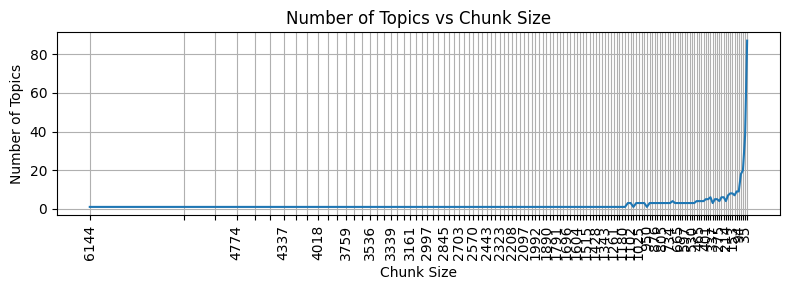

In [136]:
plt.figure(figsize=(8, 3))
plt.plot(chunk_sizes, topic_counts)
plt.gca().invert_xaxis()
plt.xlabel("Chunk Size")
plt.ylabel("Number of Topics")
plt.title("Number of Topics vs Chunk Size")
plt.grid(True)
plt.xticks(chunk_sizes, rotation=90)
plt.tight_layout()
for i, label in enumerate(plt.gca().get_xticklabels()):
    label.set_visible(i % 3 == 0)
plt.show()

In [137]:
for cs, count in zip(chunk_sizes, topic_counts):
    print(f"Chunk size: {cs}, Number of topics: {count}")

Chunk size: 6144, Number of topics: 1
Chunk size: 5261, Number of topics: 1
Chunk size: 4979, Number of topics: 1
Chunk size: 4774, Number of topics: 1
Chunk size: 4607, Number of topics: 1
Chunk size: 4464, Number of topics: 1
Chunk size: 4337, Number of topics: 1
Chunk size: 4222, Number of topics: 1
Chunk size: 4116, Number of topics: 1
Chunk size: 4018, Number of topics: 1
Chunk size: 3927, Number of topics: 1
Chunk size: 3841, Number of topics: 1
Chunk size: 3759, Number of topics: 1
Chunk size: 3682, Number of topics: 1
Chunk size: 3607, Number of topics: 1
Chunk size: 3536, Number of topics: 1
Chunk size: 3468, Number of topics: 1
Chunk size: 3403, Number of topics: 1
Chunk size: 3339, Number of topics: 1
Chunk size: 3278, Number of topics: 1
Chunk size: 3218, Number of topics: 1
Chunk size: 3161, Number of topics: 1
Chunk size: 3105, Number of topics: 1
Chunk size: 3050, Number of topics: 1
Chunk size: 2997, Number of topics: 1
Chunk size: 2945, Number of topics: 1
Chunk size: 